In [1]:
import numpy as np
from numpy import exp, log
from numpy.linalg import norm
from numpy.random import random
import matplotlib.pyplot as plt

In [2]:
def generate_random_experiment(n):
    C = random((n, n)) * 10
    p = random((n, ))
    p /= sum(p) / 10
    q = random((n, ))
    q /= sum(q) / 10
    return C, p, q

In [11]:
def sinkhorn(n, C, p, q, eps, gamma):
    history = []
    
    m = np.ones(n)

    X_new = X = 1/n**2 * np.ones((n, n))
    t = 0
    while not (sum(abs(norm(X_new, 1, axis=1) - p)) + sum(abs(norm(X_new, 1, axis=0) - q)) <= eps):
        l = gamma * log(1/p * norm(exp(-(gamma + C + m) / gamma) * X + 1e-15, 1, axis=1))
        m = gamma * log(1/q * norm(exp(-(gamma + C + l) / gamma) * X + 1e-15, 1, axis=1))
        X_new = X * np.array(exp( -(gamma + C + np.matrix(l).T + m)/gamma ))

        history.append(sum(abs(norm(X_new, 1, axis=1) - p)) + sum(abs(norm(X_new, 1, axis=0) - q)))
        if t >= 10000:
            break
        t += 1
    
    return X_new, t, history

In [12]:
n = 100
C, p, q = generate_random_experiment(n)

In [19]:
eps = 0.02
gamma = eps /(4 * log(n))
X, t, history = sinkhorn(n, C, p, q, eps, gamma)

In [20]:
t

10000

In [16]:
eps = 0.02
gamma = 10000
tt = []
gg = []
t = 0

while t < 10000:
    gamma = gamma / 1.1
    X, t, history = sinkhorn(n, C, p, q, eps, gamma)
    gg.append(gamma)
    tt.append(t)

gamma *= 1.1

In [17]:
gamma

182.60271200148696

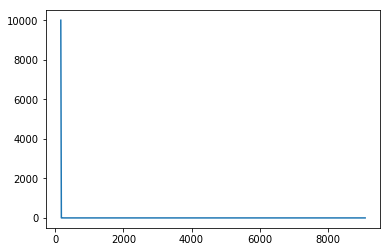

In [18]:
plt.plot(gg, tt)